# Sign Language Classification

Даны  картинки с символами языка жестов ASL (Americal Sign Language). Необходимо построить модель машинного обучения, которая смогла бы правильно распознавать символы языка жестов и классифицировать их в определенные группы. 

![](https://user-images.githubusercontent.com/34737471/55292500-52acb580-5409-11e9-9a78-7cdc0d8da8b6.png)

## 1. Первичный анализ данных

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
train_df = pd.read_csv('../input/sign-language-mnist/sign_mnist_train/sign_mnist_train.csv')
test_df = pd.read_csv('../input/sign-language-mnist/sign_mnist_test/sign_mnist_test.csv')

In [4]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [5]:
train_df.shape, test_df.shape

((27455, 785), (7172, 785))

In [6]:
y_train = train_df['label']
y_test = test_df['label']

X_train = train_df.drop(columns='label')
X_test = test_df.drop(columns='label')

In [7]:
def show_images(images,labels):
    images = images.values.reshape(-1,28,28,1)
    unique_labels = y_train.unique()
    fig,ax = plt.subplots(2,5)
    fig.set_size_inches(10, 6)
    k =0
    for i in range(2):
        for j in range(5):
            ax[i,j].imshow(images[k] , cmap='gray')
            ax[i,j].set_title(str(unique_labels[y_train[k]]))
            k = k+1;
    plt.tight_layout()

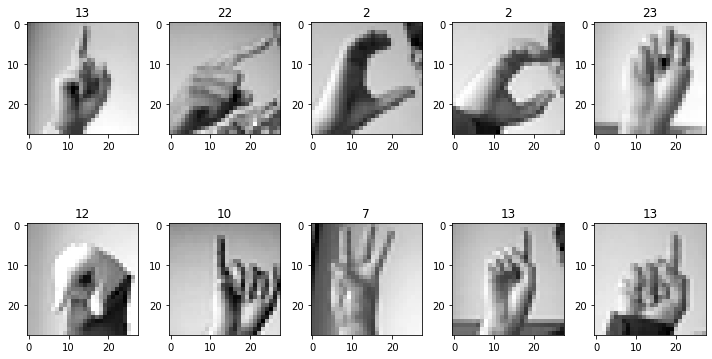

In [8]:
show_images(X_train, y_train)

Распределение классов в trainset

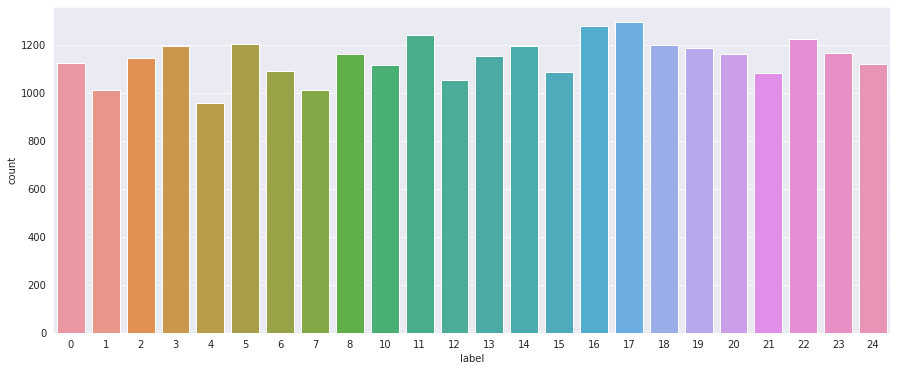

In [9]:
plt.figure(figsize=(15,6))
sns.set_style("darkgrid")
sns.countplot(x=y_train)
plt.show()

Распределение классов в testset

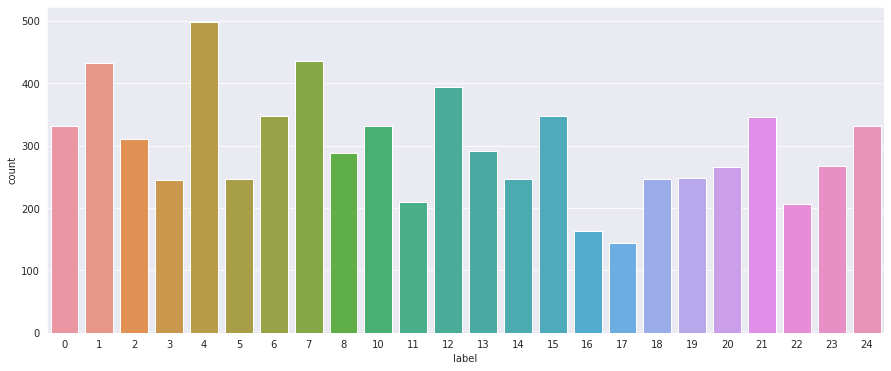

In [10]:
plt.figure(figsize=(15,6))
sns.set_style("darkgrid")
sns.countplot(x=y_test)
plt.show()

## 2. Построение простых методов многоклассовой классификации

Использованные модели:

* Линейные модели
* Решающие деревья
* Байесовские методы

In [11]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import ExtraTreeClassifier, DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from xgboost.sklearn import XGBClassifier 
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [12]:
svc = SVC(random_state=5)
svc.fit(X_train, y_train)
print('='*25)
print('SVC')
print(f'accuracy of train set: {svc.score(X_train, y_train)}')
print(f'accuracy of test set: {svc.score(X_test, y_test)}')

SVC
accuracy of train set: 1.0
accuracy of test set: 0.8418851087562744


In [13]:
lsvc = LinearSVC()
lsvc.fit(X_train, y_train)
print('='*25)
print('LinearSVC')
print(f'accuracy of train set: {lsvc.score(X_train, y_train)}')
print(f'accuracy of test set: {lsvc.score(X_test, y_test)}')

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC
accuracy of train set: 0.9999635767619741
accuracy of test set: 0.6087562744004462


In [14]:
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
print('='*25)
print('SGD Classifier')
print(f'accuracy of train set: {sgd.score(X_train, y_train)}')
print(f'accuracy of test set: {sgd.score(X_test, y_test)}')

SGD Classifier
accuracy of train set: 0.9959570205791295
accuracy of test set: 0.634829894032348


In [15]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print('='*25)
print('KNeighborsClassifier')
print(f'accuracy of train set: {knn.score(X_train, y_train)}')
print(f'accuracy of test set: {knn.score(X_test, y_test)}')

KNeighborsClassifier
accuracy of train set: 0.9992715352394828
accuracy of test set: 0.8059118795315114


In [16]:
rf = RandomForestClassifier(random_state=5)
rf.fit(X_train, y_train)
print('='*25)
print('RandomForestClassifier')
print(f'accuracy of train set: {rf.score(X_train, y_train)}')
print(f'accuracy of test set: {rf.score(X_test, y_test)}')

RandomForestClassifier
accuracy of train set: 1.0
accuracy of test set: 0.8092582264361405


In [17]:
decisiontree = DecisionTreeClassifier(max_depth=50, random_state=5)
decisiontree.fit(X_train, y_train)
print('='*25)
print('DecisionTreeClassifier')
print(f'accuracy of train set: {decisiontree.score(X_train, y_train)}')
print(f'accuracy of test set: {decisiontree.score(X_test, y_test)}')

DecisionTreeClassifier
accuracy of train set: 1.0
accuracy of test set: 0.4348856664807585


In [18]:
bagging = BaggingClassifier(ExtraTreeClassifier(random_state=5))
bagging.fit(X_train, y_train)
print('='*25)
print('BaggingClassifier')
print(f'accuracy of train set: {bagging.score(X_train, y_train)}')
print(f'accuracy of test set: {bagging.score(X_test, y_test)}')

BaggingClassifier
accuracy of train set: 0.9999635767619741
accuracy of test set: 0.6373396542108198


In [19]:
lgbm = LGBMClassifier()
lgbm.fit(X_train, y_train)
print('='*25)
print('LGBM Classifier')
print(f'accuracy of train set: {lgbm.score(X_train, y_train)}')
print(f'accuracy of test set: {lgbm.score(X_test, y_test)}')

LGBM Classifier
accuracy of train set: 1.0
accuracy of test set: 0.7937813720022309


In [20]:
catboost = CatBoostClassifier(learning_rate=0.3, max_depth=10, n_estimators=25)
catboost.fit(X_train, y_train)
print('='*25)
print('CatBoost Classifier')
print(f'accuracy of train set: {catboost.score(X_train, y_train)}')
print(f'accuracy of test set: {catboost.score(X_test, y_test)}')

0:	learn: 2.4088305	total: 34.9s	remaining: 13m 56s
1:	learn: 1.9359334	total: 1m 10s	remaining: 13m 28s
2:	learn: 1.5939200	total: 1m 45s	remaining: 12m 54s
3:	learn: 1.3613254	total: 2m 20s	remaining: 12m 16s
4:	learn: 1.1771566	total: 2m 54s	remaining: 11m 38s
5:	learn: 1.0555906	total: 3m 28s	remaining: 10m 59s
6:	learn: 0.9468483	total: 4m 3s	remaining: 10m 24s
7:	learn: 0.8238494	total: 4m 38s	remaining: 9m 51s
8:	learn: 0.7333758	total: 5m 12s	remaining: 9m 15s
9:	learn: 0.6519195	total: 5m 47s	remaining: 8m 41s
10:	learn: 0.5947239	total: 6m 21s	remaining: 8m 5s
11:	learn: 0.5424499	total: 7m	remaining: 7m 35s
12:	learn: 0.4983981	total: 7m 35s	remaining: 7m
13:	learn: 0.4694163	total: 8m 8s	remaining: 6m 23s
14:	learn: 0.4417850	total: 8m 42s	remaining: 5m 48s
15:	learn: 0.4199057	total: 9m 16s	remaining: 5m 12s
16:	learn: 0.3886450	total: 9m 51s	remaining: 4m 38s
17:	learn: 0.3686915	total: 10m 24s	remaining: 4m 2s
18:	learn: 0.3399776	total: 11m	remaining: 3m 28s
19:	learn: 

In [21]:
%%time
estimators = [
    ("svc", svc), 
    ("knn", knn),
    ("rf", rf),
    ("extratree", bagging),
    ("lgbm", lgbm)]

vote = VotingClassifier(estimators=estimators)
vote.fit(X_train, y_train)
print('='*25)
print('VotingClassifier')
print(f'accuracy of train set: {vote.score(X_train, y_train)}')
print(f'accuracy of test set: {vote.score(X_test, y_test)}')

VotingClassifier
accuracy of train set: 1.0
accuracy of test set: 0.8457891801450084
CPU times: user 39min 3s, sys: 3.39 s, total: 39min 6s
Wall time: 28min 21s


In [22]:
y_pred = vote.predict(X_test)

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       331
           1       0.99      0.95      0.97       432
           2       0.94      1.00      0.97       310
           3       0.90      1.00      0.95       245
           4       0.88      0.99      0.93       498
           5       0.88      0.92      0.90       247
           6       0.93      0.96      0.94       348
           7       0.99      0.94      0.96       436
           8       0.84      0.86      0.85       288
          10       0.80      0.75      0.77       331
          11       0.83      1.00      0.91       209
          12       0.85      0.71      0.77       394
          13       0.87      0.59      0.70       291
          14       0.99      0.87      0.92       246
          15       1.00      1.00      1.00       347
          16       0.94      1.00      0.97       164
          17       0.26      0.49      0.34       144
          18       0.71    

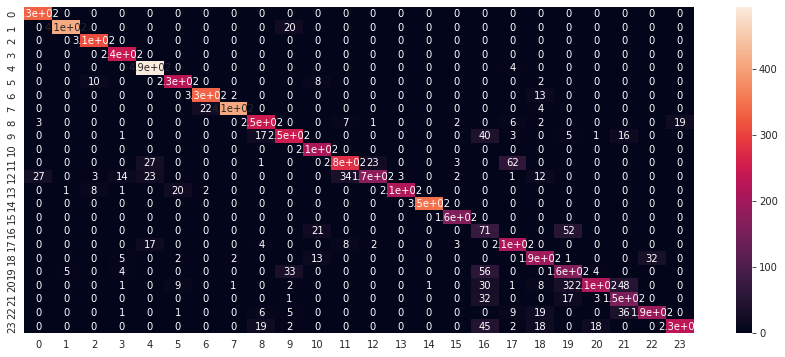

In [24]:
plt.figure(figsize=(15,6))
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True)
plt.show()

## 3. Использование методов понижения размерности

In [12]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [33]:
y_train = train_df['label']
y_test = test_df['label']

X_train = train_df.drop(columns='label')
X_test = test_df.drop(columns='label')

In [34]:
X = pd.concat([X_train, X_test])
y = pd.concat([y_train, y_test])

In [35]:
%%time
only_pca_model = PCA()
only_pca_model.n_components = 200
only_pca_data = only_pca_model.fit_transform(X/255)
only_pca_data = np.vstack((only_pca_data.T)).T

pca_tsne_model = TSNE(n_components=2, random_state=0, perplexity=70, n_iter=1000)
pca_tsne_data = pca_tsne_model.fit_transform(only_pca_data)

pca_tsne_data = np.vstack((pca_tsne_data.T, y)).T
pca_tsne_train = pd.DataFrame(pca_tsne_data, columns = ('PC 1', 'PC 2', 'label'))
pca_tsne_train.head()

CPU times: user 26min 29s, sys: 29.3 s, total: 26min 58s
Wall time: 12min 52s


,PC 1,PC 2,label
0,12.154053,-23.577303,3.0
1,48.225525,-20.805882,6.0
2,-2.169834,-73.655571,2.0
3,16.968861,-77.032829,2.0
4,-48.248055,9.476110,13.0


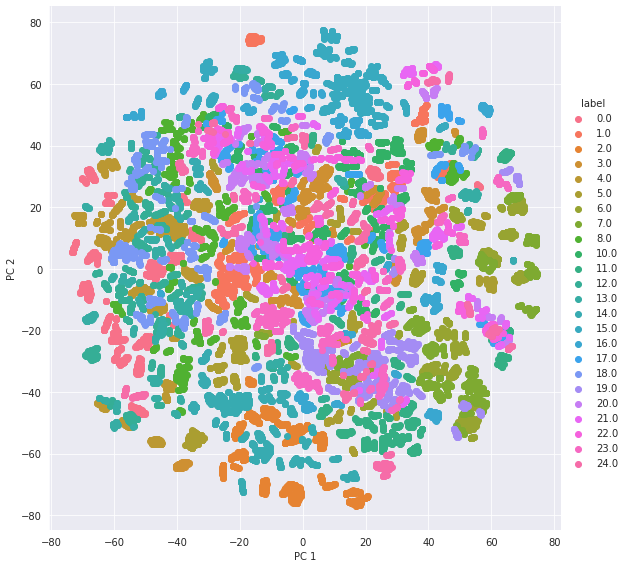

In [36]:
sns.FacetGrid(pca_tsne_train, hue='label', height=8).map(plt.scatter, 'PC 1', "PC 2").add_legend()
plt.show()

In [37]:
X_pca_train = pca_tsne_train.drop(columns=['label'])[:27455]
y_pca_train = pca_tsne_train['label'][:27455]

X_pca_test = pca_tsne_train.drop(columns=['label'])[27455:].reset_index(drop=True)
y_pca_test = pca_tsne_train['label'][27455:].reset_index(drop=True)

In [38]:
X_pca_train = X_pca_train.join(X_train)
X_pca_test = X_pca_test.join(X_test)

In [39]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_pca_train, y_pca_train)
print('='*25)
print('KNeighborsClassifier')
print(f'accuracy of train set: {knn.score(X_pca_train, y_pca_train)}')
print(f'accuracy of test set: {knn.score(X_pca_test, y_pca_test)}')

KNeighborsClassifier
accuracy of train set: 0.9992715352394828
accuracy of test set: 0.8059118795315114


In [40]:
rf = RandomForestClassifier(random_state=5)
rf.fit(X_pca_train, y_pca_train)
print('='*25)
print('RandomForestClassifier')
print(f'accuracy of train set: {rf.score(X_pca_train, y_pca_train)}')
print(f'accuracy of test set: {rf.score(X_pca_test, y_pca_test)}')

RandomForestClassifier
accuracy of train set: 1.0
accuracy of test set: 0.8194366982710541


In [13]:
only_pca_model = PCA()
only_pca_model.n_components = 200
only_pca_data = only_pca_model.fit_transform(X_train/255)
only_pca_data = np.vstack((only_pca_data.T, y_train)).T

pca_tsne_model = TSNE(n_components =2, random_state =0, perplexity =50, n_iter=1000)
pca_tsne_data = pca_tsne_model.fit_transform(only_pca_data)

pca_tsne_data = np.vstack((pca_tsne_data.T, y_train)).T
pca_tsne_df = pd.DataFrame(pca_tsne_data, columns = ('PC 1', 'PC 2', 'label'))
pca_tsne_df.head()

,PC 1,PC 2,label
0,-3.870121,40.965275,3.0
1,53.128525,40.620705,6.0
2,-7.249402,83.643982,2.0
3,-31.476578,74.079727,2.0
4,-49.067455,1.917578,13.0


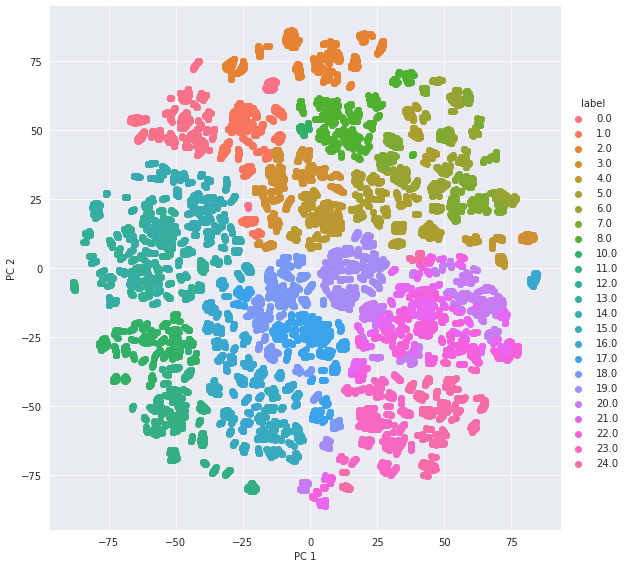

In [15]:
sns.FacetGrid(pca_tsne_df, hue='label', height=8).map(plt.scatter, 'PC 1', "PC 2").add_legend()
plt.show()

## 3. Построение нейронных сетей

In [16]:
import torch
import torchvision
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

In [30]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.layer_1 = nn.Linear(input_size, hidden_size)
        self.layer_2 = nn.Linear(hidden_size, 128)
        self.layer_3 = nn.Linear(128, num_classes)
        
        self.relu = nn.ReLU()
        
    def forward(self, inputs):
        output_1 = self.relu(self.layer_1(inputs))
        output_2 = self.relu(self.layer_2(output_1))
        output = self.layer_3(output_2)
        
        return output

In [33]:
train_df = pd.read_csv('../input/sign-language-mnist/sign_mnist_train/sign_mnist_train.csv')
test_df = pd.read_csv('../input/sign-language-mnist/sign_mnist_test/sign_mnist_test.csv')

In [34]:
train_labels = train_df['label'].values 
test_labels=test_df['label'].values
train_images = (train_df.iloc[:,1:].values).astype('float32')
test_images = (test_df.iloc[:,1:].values).astype('float32')

In [35]:
train_images = train_images.reshape(train_images.shape[0], 28, 28)
test_images = test_images.reshape(test_images.shape[0], 28, 28)

In [36]:
train_images_tensor = (torch.tensor(train_images)/255.0)
train_labels_tensor = (torch.tensor(train_labels))
train_tensor = TensorDataset(train_images_tensor, train_labels_tensor)

test_images_tensor = (torch.tensor(test_images)/255.0)
test_labels_tensor = (torch.tensor(test_labels))
test_tensor = TensorDataset(test_images_tensor, test_labels_tensor)

In [37]:
train_loader = DataLoader(train_tensor, batch_size=16, num_workers=2, shuffle=True)
test_loader = DataLoader(test_tensor, batch_size=16, num_workers=2, shuffle=False)

In [50]:
model = NeuralNet(28*28, 500, 25)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
num_epoch = 50

In [51]:
torch.manual_seed(0)

total_step = len(train_loader)
for epoch in range(num_epoch):
    for i, (images, labels) in enumerate(train_loader):  
        images = images.reshape(-1, 28*28)

        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    
    print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
           .format(epoch+1, num_epoch, i+1, total_step, loss.item()))

Epoch [1/50], Step [1716/1716], Loss: 1.3955
Epoch [2/50], Step [1716/1716], Loss: 0.8616
Epoch [3/50], Step [1716/1716], Loss: 0.6155
Epoch [4/50], Step [1716/1716], Loss: 0.2827
Epoch [5/50], Step [1716/1716], Loss: 0.2190
Epoch [6/50], Step [1716/1716], Loss: 0.0350
Epoch [7/50], Step [1716/1716], Loss: 0.2172
Epoch [8/50], Step [1716/1716], Loss: 0.1060
Epoch [9/50], Step [1716/1716], Loss: 0.0242
Epoch [10/50], Step [1716/1716], Loss: 0.0017
Epoch [11/50], Step [1716/1716], Loss: 0.0025
Epoch [12/50], Step [1716/1716], Loss: 0.0011
Epoch [13/50], Step [1716/1716], Loss: 0.3604
Epoch [14/50], Step [1716/1716], Loss: 0.0026
Epoch [15/50], Step [1716/1716], Loss: 0.1307
Epoch [16/50], Step [1716/1716], Loss: 0.0025
Epoch [17/50], Step [1716/1716], Loss: 0.0003
Epoch [18/50], Step [1716/1716], Loss: 0.0026
Epoch [19/50], Step [1716/1716], Loss: 0.0776
Epoch [20/50], Step [1716/1716], Loss: 0.0009
Epoch [21/50], Step [1716/1716], Loss: 0.0024
Epoch [22/50], Step [1716/1716], Loss: 0.00

In [54]:
with torch.no_grad():
    correct = 0
    total = 0
    for i, (images, labels) in enumerate(train_loader): 
        images = images.reshape(-1, 28*28)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy: {} %'.format(100 * correct / total))

Accuracy: 100.0 %


In [55]:
pred_lst = []
with torch.no_grad():
    correct = 0
    total = 0
    for i, (images, labels) in enumerate(test_loader): 
        images = images.reshape(-1, 28*28)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        pred_lst.extend(list(predicted))
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy: {} %'.format(100 * correct / total))

Accuracy: 79.72671500278862 %
